In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [39]:
df = pd.read_csv(r"C:\Users\anshi\Downloads\old car data.csv")
df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Mahindra XUV500,2008,2.94,77097,Petrol,Dealer,Manual,0,1.08
1,Maruti Swift,2007,12.83,13331,Petrol,Dealer,Manual,1,3.79
2,Maruti Swift,2022,5.98,175363,CNG,Individual,Manual,3,3.67
3,Hyundai Verna,2010,14.72,94194,Diesel,Dealer,Manual,2,3.08
4,Hyundai Verna,2008,8.78,95165,CNG,Individual,Manual,3,2.84


In [41]:
df.shape

(2000, 9)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       2000 non-null   object 
 1   Year           2000 non-null   int64  
 2   Present_Price  2000 non-null   float64
 3   Kms_Driven     2000 non-null   int64  
 4   Fuel_Type      2000 non-null   object 
 5   Seller_Type    2000 non-null   object 
 6   Transmission   2000 non-null   object 
 7   Owner          2000 non-null   int64  
 8   Selling_Price  2000 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 140.8+ KB


In [6]:
df.describe()


,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,2013.866500,11.078125,104511.217500,1.547500,4.63199
std,5.383323,5.135927,56398.554611,1.135953,2.90480
min,2005.000000,2.510000,5051.000000,0.000000,0.50000
25%,2009.000000,6.472500,56023.000000,1.000000,2.32000
50%,2014.000000,11.165000,106511.000000,2.000000,3.96000
75%,2019.000000,15.512500,153371.000000,3.000000,6.36000
max,2023.000000,19.990000,199962.000000,3.000000,15.98000


In [9]:
df.isnull().sum()


Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [10]:
df.dropna(inplace=True)


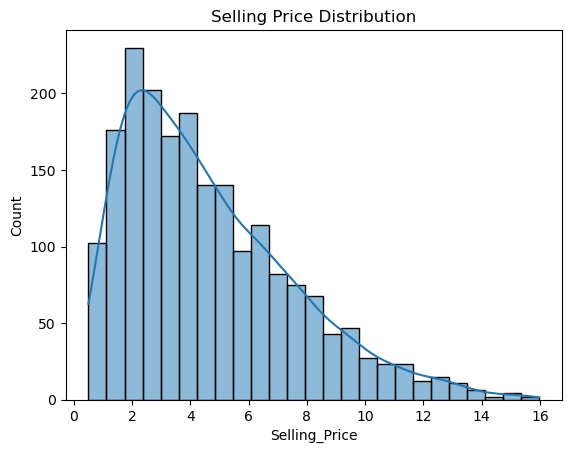

In [11]:
plt.figure()
sns.histplot(df["Selling_Price"], kde=True)
plt.title("Selling Price Distribution")
plt.show()


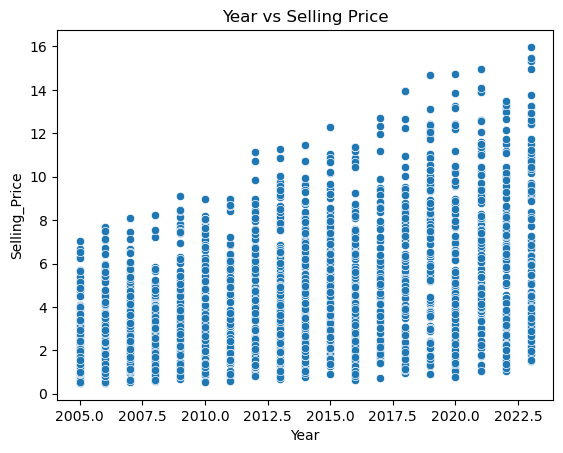

In [12]:
plt.figure()
sns.scatterplot(x="Year", y="Selling_Price", data=df)
plt.title("Year vs Selling Price")
plt.show()


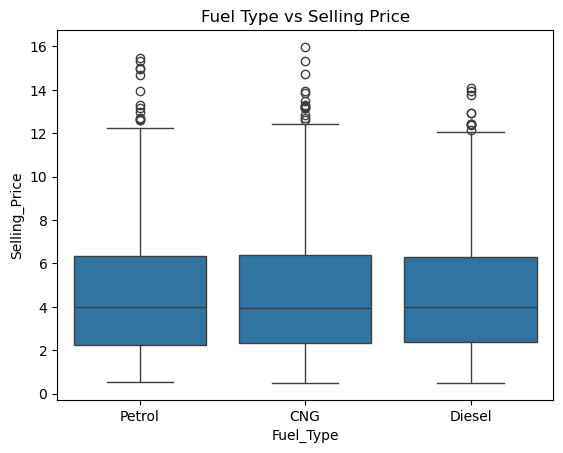

In [13]:
plt.figure()
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=df)
plt.title("Fuel Type vs Selling Price")
plt.show()


In [14]:
df.drop("Car_Name", axis=1, inplace=True)


In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,Year,Present_Price,Kms_Driven,Owner,Selling_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2008,2.94,77097,0,1.08,False,True,False,True
1,2007,12.83,13331,1,3.79,False,True,False,True
2,2022,5.98,175363,3,3.67,False,False,True,True
3,2010,14.72,94194,2,3.08,True,False,False,True
4,2008,8.78,95165,3,2.84,False,False,True,True


In [16]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [20]:
print("Linear Regression")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression
R2 Score: 0.6740662650964033
MAE: 1.2251835050800266
RMSE: 1.5918448263409264


In [21]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


In [22]:
print("Random Forest Regressor")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Regressor
R2 Score: 0.6966698836787102
MAE: 1.14510625
RMSE: 1.5356556411595017


In [23]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
})

comparison


,Model,R2 Score
0,Linear Regression,0.674066
1,Random Forest,0.696670


In [24]:
new_car = pd.DataFrame(
    [[2018, 5.5, 35000, 1, 0, 1, 0, 0]],
    columns=X.columns
)


In [25]:
new_car_scaled = scaler.transform(new_car)


In [26]:
predicted_price = rf.predict(new_car_scaled)
predicted_price


array([2.9641])